## Importing Libraries and Packages

from google.colab import drive

drive.mount("/content/drive")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)


## Reading the Dataset

## Details of the dataset

#### The dataset contains 7043 rows and 21 columns. The dataset contains the following columns:

> * **customerID** - Customer ID

> * **gender** - Female or Male

> * **SeniorCitizen** - Whether the customer is a senior citizen or not (1, 0)

> * **Partner** - Whether the customer has a partner or not (Yes, No)

> * **Dependents** - Whether the customer has dependents or not (Yes, No)

> * **tenure** - Number of months the customer has stayed with the company

> * **PhoneService** - Whether the customer has a phone service or not (Yes, No)

> * **MultipleLines** - Whether the customer has multiple lines or not (Yes, No, No phone service)

> * **InternetService** - Customer’s internet service provider (DSL, Fiber optic, No)

> * **OnlineSecurity** - Whether the customer has online security or not (Yes, No, No internet service)

> * **OnlineBackup** - Whether the customer has online backup or not (Yes, No, No internet service)

> * **DeviceProtection** - Whether the customer has device protection or not (Yes, No, No internet service)

> * **TechSupport** - Whether the customer has tech support or not (Yes, No, No internet service)

> * **StreamingTV** - Whether the customer has streaming TV or not (Yes, No, No internet service)

> * **StreamingMovies** - Whether the customer has streaming movies or not (Yes, No, No internet service)

> * **Contract** - The contract term of the customer (Month-to-month, One year, Two year)

> * **PaperlessBilling** - Whether the customer has paperless billing or not (Yes, No)

> * **PaymentMethod** - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

> * **MonthlyCharges** - The amount charged to the customer monthly

> * **TotalCharges** - The total amount charged to the customer

> * **Churn** - Whether the customer churned or not (Yes or No)


In [3]:
df = pd.read_csv(
    r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\Tel-Customer-Churn.csv"
)


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Structure and Summary

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Checking the null values

In [6]:
df.isna().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

There are no null values in the dataset.

## Checking the structure of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> ## Printing unique values of each column

In [8]:
for i in list(df.columns):
    print(i, " ", df[i].unique())


customerID   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank tr

In [9]:
# While Checking the TotalCharges column, we can see that there are some values which are empty

# So we are going to check the dataframes where TotalCharges is empty.

df[df["TotalCharges"] == " "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


> #### We can see that the tenure of these customers is 0 and the total charges are 0. This is not possible. So, we will remove these rows.

## Cleaning the data

In [10]:
# Dropping the customerID column as it is not required for the analysis
df.drop(["customerID"], axis=1, inplace=True)

# Changing the name Month-to-month to Monthly

df.Contract.replace("Month-to-month", "Monthly", inplace=True)

# Dropping the rows where TotalCharges is empty

df.drop(df[df["TotalCharges"] == " "].index, inplace=True)
df.TotalCharges = df.TotalCharges.astype(float)


> ### Encoding Ordinal Variables using Label Encoder and Dummifying Nominial Variables using One Hot Encoder with K-1 dummy variables.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

coltoenc = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "Contract",
    "PaperlessBilling",
    "Churn",
]

for i in coltoenc:
    df[i] = le.fit_transform(df[i])

> ### Dummifying the variables

In [12]:
# Dummiying the remaining categorical columns

for i in [
    "gender",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaymentMethod",
]:
    df = pd.concat(
        [df, pd.get_dummies(df[i], prefix=i, drop_first=True)], axis=1)
    df.drop(i, axis=1, inplace=True)


> ### Checking Dataframe after Preprocessing

In [13]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,2,1,0,1,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Plotting Correlation Matrix

<Axes: >

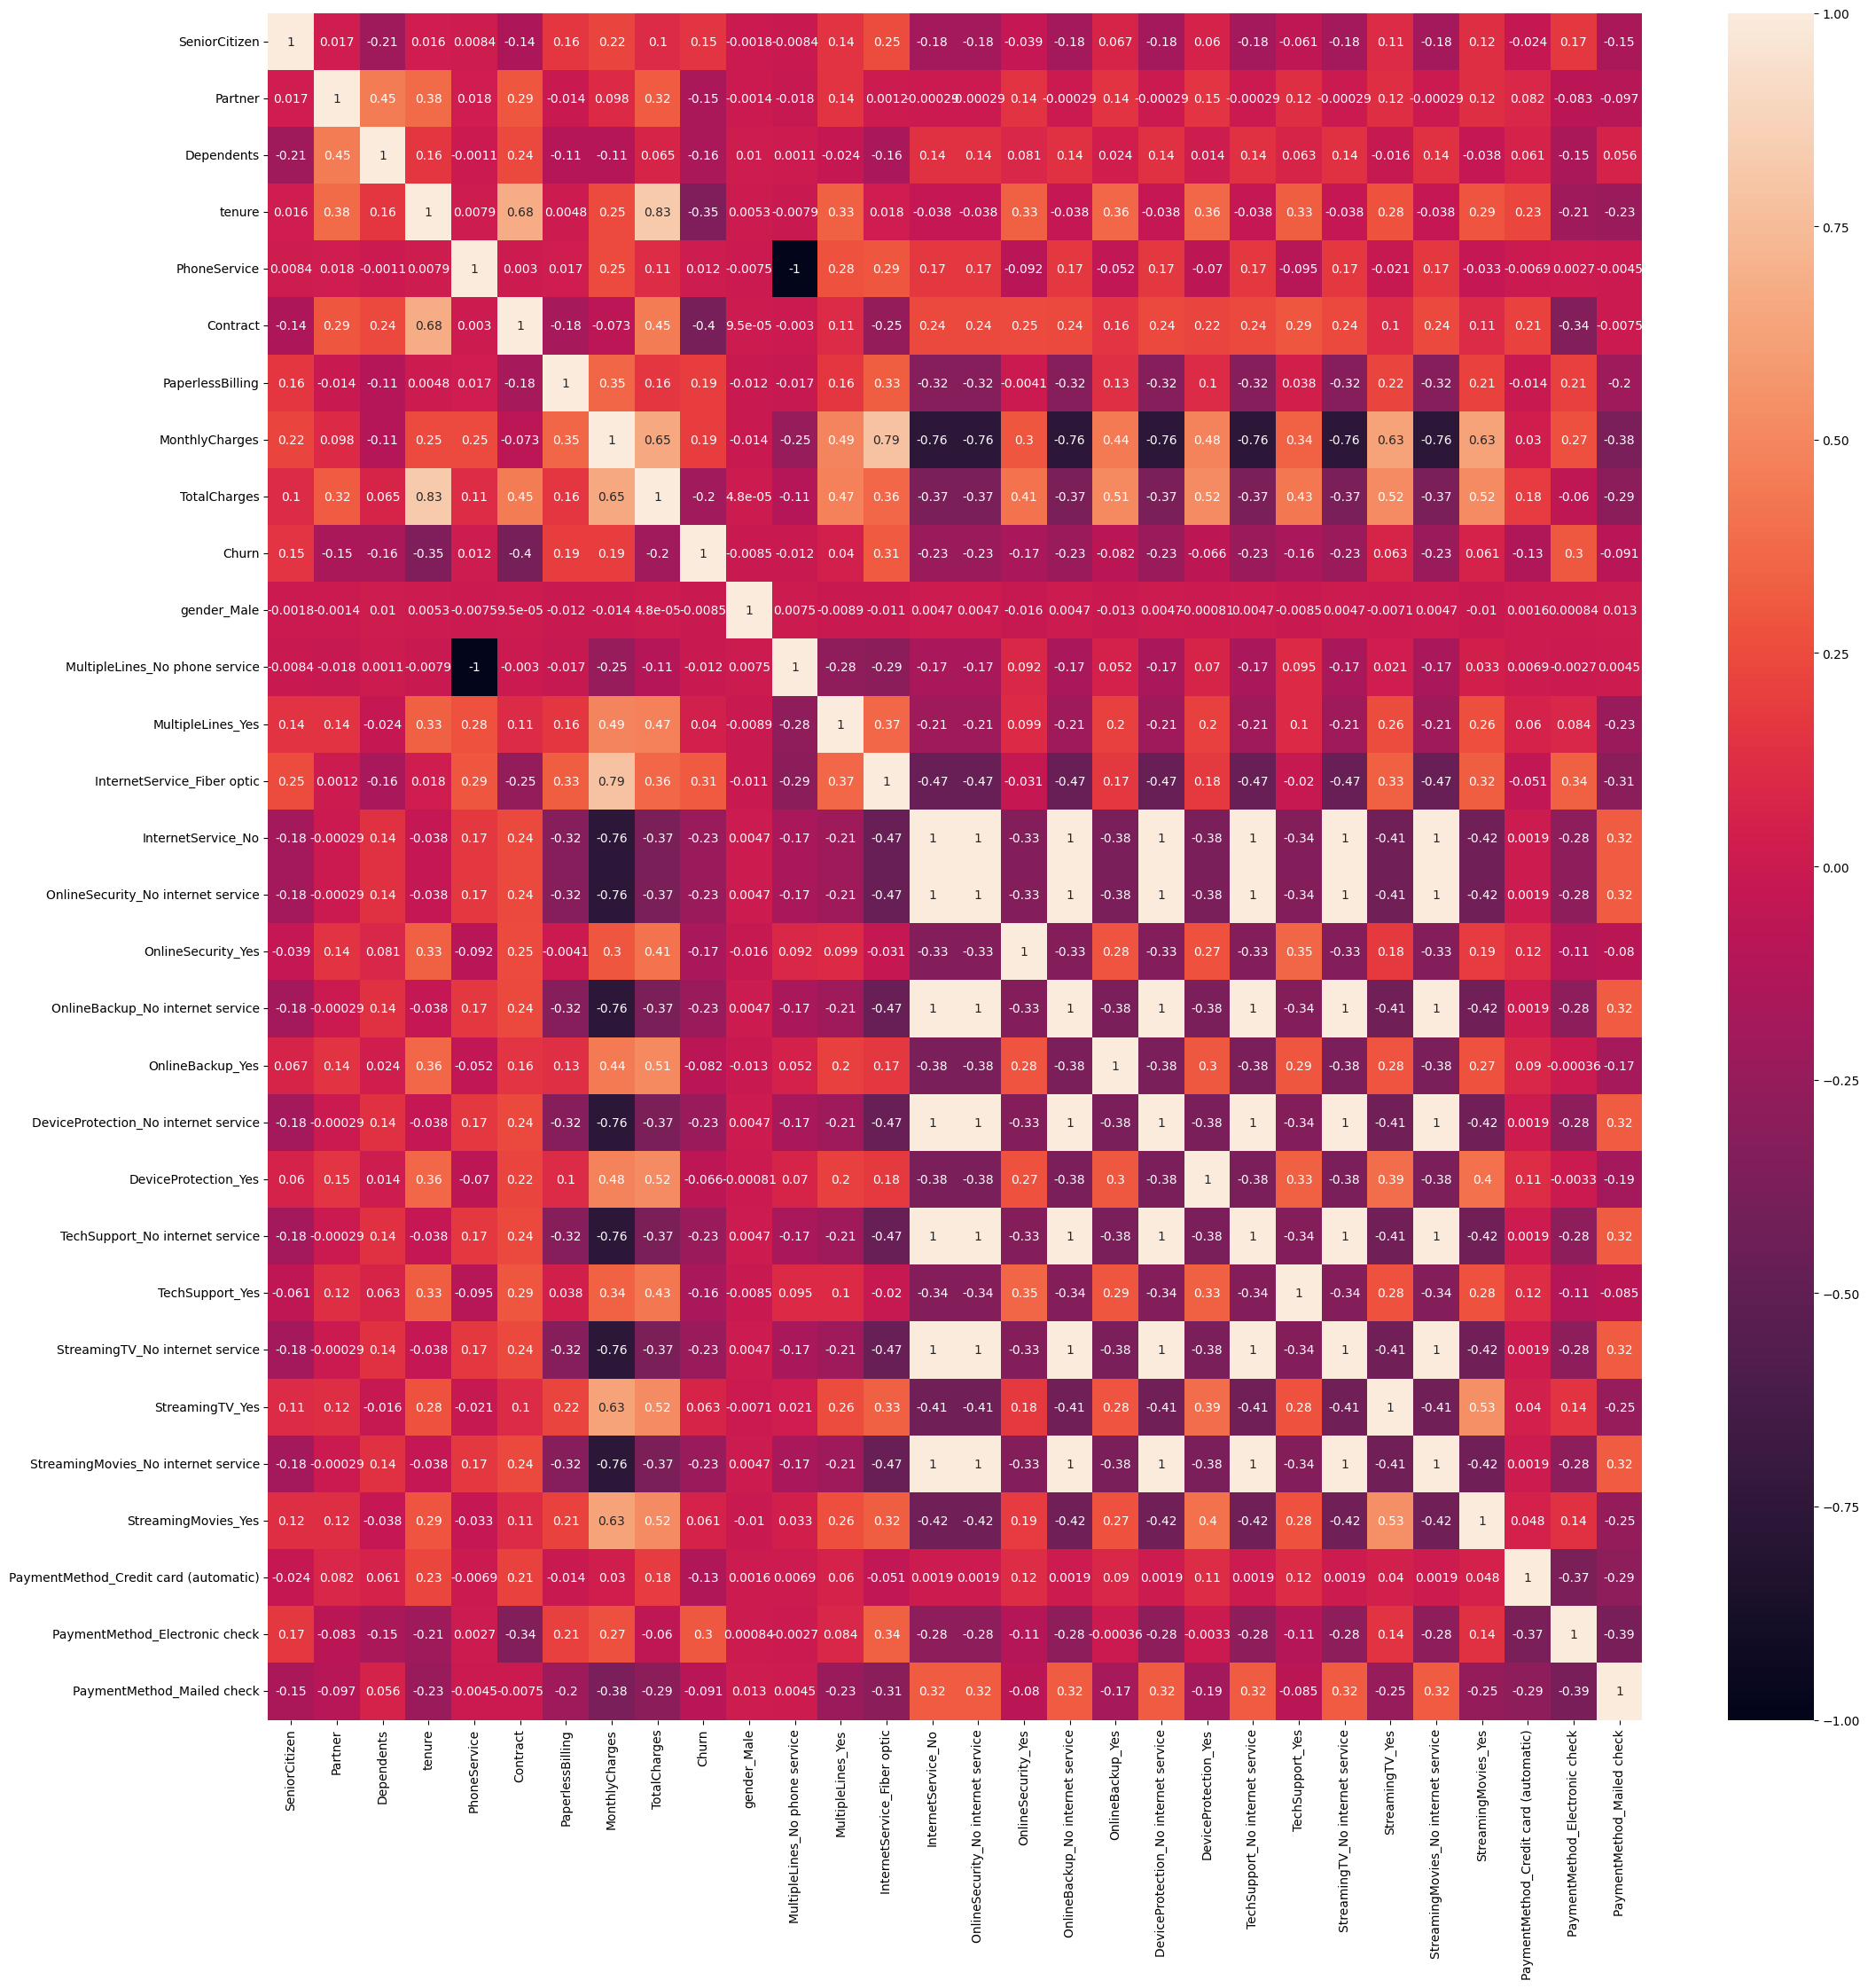

In [14]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True)


In [15]:
# Getting the column name with correlation greater than 0.1 and less than -0.1

corr = df.corr()["Churn"]
featwithgoodcorr = list(corr[(corr < -0.2) | (corr > 0.2)].index)


## Querying the data to get churn based on Contarct types

In [16]:
a = df[["Churn", "Contract", "gender_Male"]].groupby(
    ["Churn", "Contract"]).count()
a.reset_index(inplace=True)


## Plot of Churn vs Contract

Text(46.11280685763889, 0.5, 'Count')

<Figure size 1000x1000 with 0 Axes>

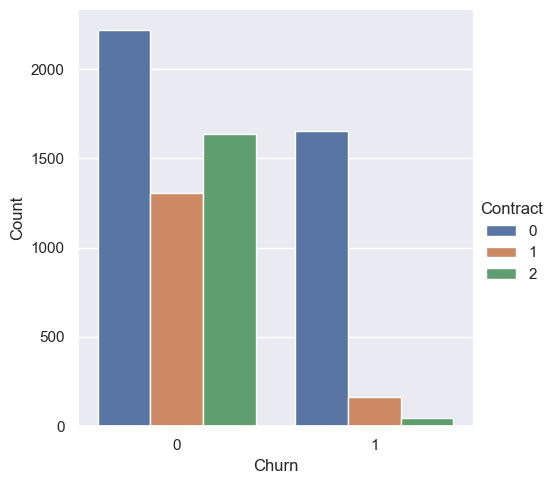

In [17]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")
sns.catplot(x="Churn", y="gender_Male", hue="Contract", data=a, kind="bar")
plt.ylabel("Count")


* **We can see that the customers with Month-to-month contract are more likely to churn.**

## Querying the dataset for count of PaperlessBilling based on Churn

In [18]:
b = (
    df[["PaperlessBilling", "Churn", "gender_Male"]]
    .groupby(["Churn", "PaperlessBilling"])
    .count()
)
b.reset_index(inplace=True)

## Plot of PaperlessBilling vs Churn

<Figure size 1000x1000 with 0 Axes>

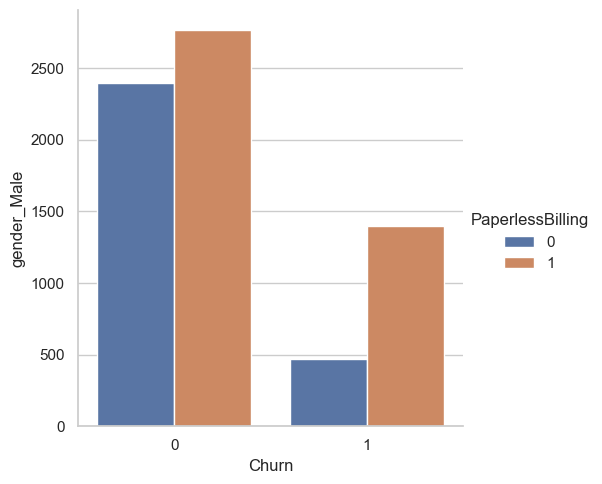

In [19]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.catplot(x="Churn", y="gender_Male",
            hue="PaperlessBilling", kind="bar", data=b)


* **We can see that the customers with PaperlessBilling are more likely to churn.**

## Distribution plot of Tenure

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

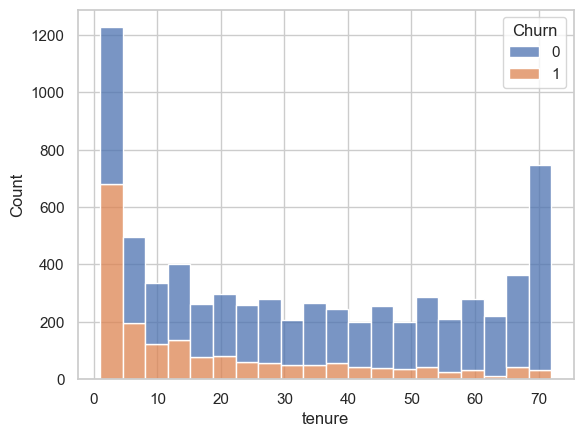

In [20]:
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=20)
plt.title


>  #### **We can see that the customers with tenure less than 10 months are more likely to churn.**

## Distribution plot of Monthly Charges

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

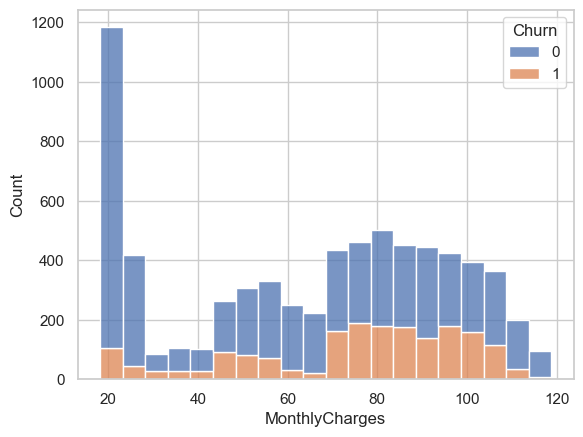

In [21]:
sns.histplot(data=df, x="MonthlyCharges",
             hue="Churn", multiple="stack", bins=20)


> #### **We can see that the customers with Monthly Charges less than 70 are more likely to churn.**

## Distribution plot of ToatalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

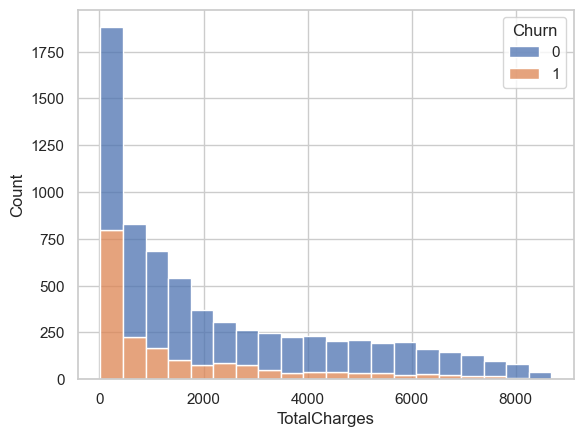

In [22]:
sns.histplot(data=df, x="TotalCharges", hue="Churn", multiple="stack", bins=20)

> #### **We can see that the customers with Total Charges less than 2000 are more likely to churn.**

## Density plot of TotalCharges based on Churn

<Axes: xlabel='TotalCharges', ylabel='Density'>

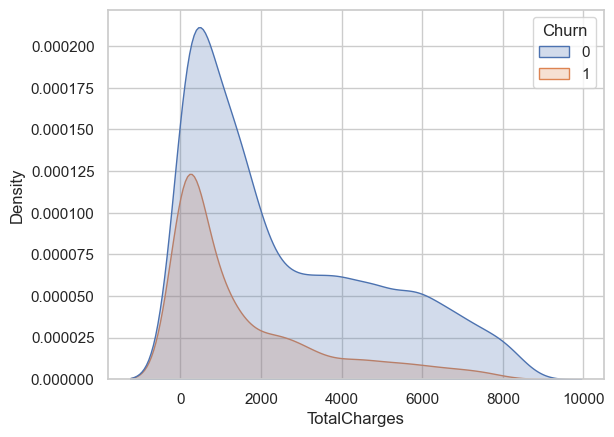

In [23]:
# Plotting TotalCharges distribution based on Churn

sns.kdeplot(data=df, x="TotalCharges", hue="Churn", shade=True)


## Density plot of MonthlyCharges based on Churn

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

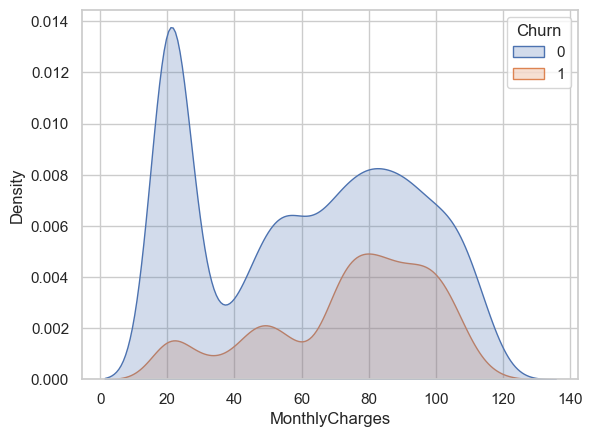

In [24]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True)


cleaneddata = df.copy(deep=True)
cleanwitselect = cleaneddata[featwithgoodcorr].copy(deep=True)
cleanwitselect.to_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\cleantelfeat.csv", index=False)
cleaneddata.to_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\cleantel.csv", index=False)
